                                                 Иззатов Эльшан Али-заде

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Лабораторная работа 9

## Библиотека Scipy. Потоки

**1.** Выберите 3 разные функции (например, парабола, гипербола, прямая, коэффициенты подберите самостоятельно). Изобразите их графики на одной координатной плоскости разными цветами (добавьте легенду). Пользователь вводит номер функции и интересующий его интервал, программа отдельно отображает выбранную функцию на данном интервале и находит точку минимума функции на данном интервале. Кроме того, программа выводит значение интеграла функции между двумя введенными точками.

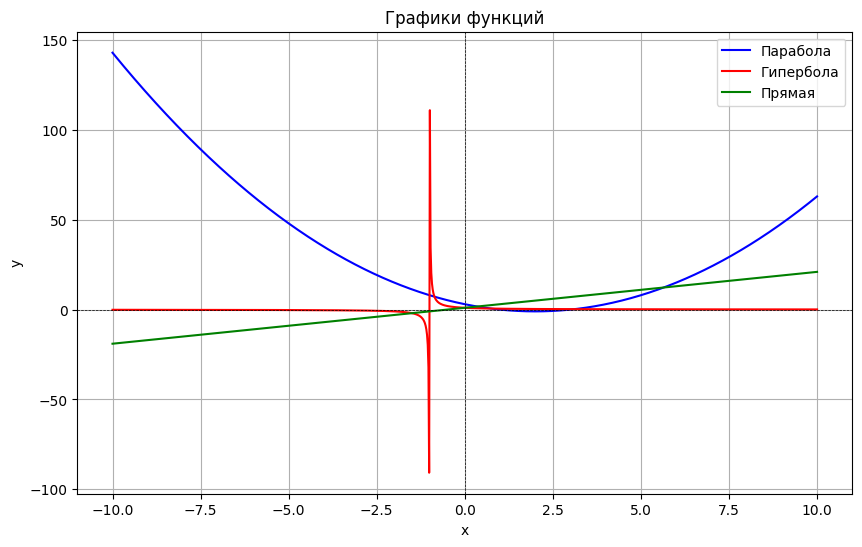

Выберите функцию:
1: Парабола
2: Гипербола
3: Прямая


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Определяем три разные функции
def parabola(x):
    return x**2 - 4*x + 3  # y = x^2 - 4x + 3

def hyperbola(x):
    return 1 / (x + 1)  # y = 1 / (x + 1)

def linear(x):
    return 2*x + 1  # y = 2x + 1
# Словарь для удобного выбора функций
functions = {
    1: {"name": "Парабола", "func": parabola, "color": "blue"},
    2: {"name": "Гипербола", "func": hyperbola, "color": "red"},
    3: {"name": "Прямая", "func": linear, "color": "green"}
}

# Построение графиков всех функций на одном графике
x = np.linspace(-10, 10, 1000)  # Интервал для графиков
plt.figure(figsize=(10, 6))

for i in functions:
    y = functions[i]["func"](x)
    plt.plot(x, y, label=functions[i]["name"], color=functions[i]["color"])

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title("Графики функций")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Ввод данных от пользователя
print("Выберите функцию:")
for i in functions:
    print(f"{i}: {functions[i]['name']}")

Введите номер функции (1, 2 или 3): 1
Введите начало интервала: 0
Введите конец интервала: 10


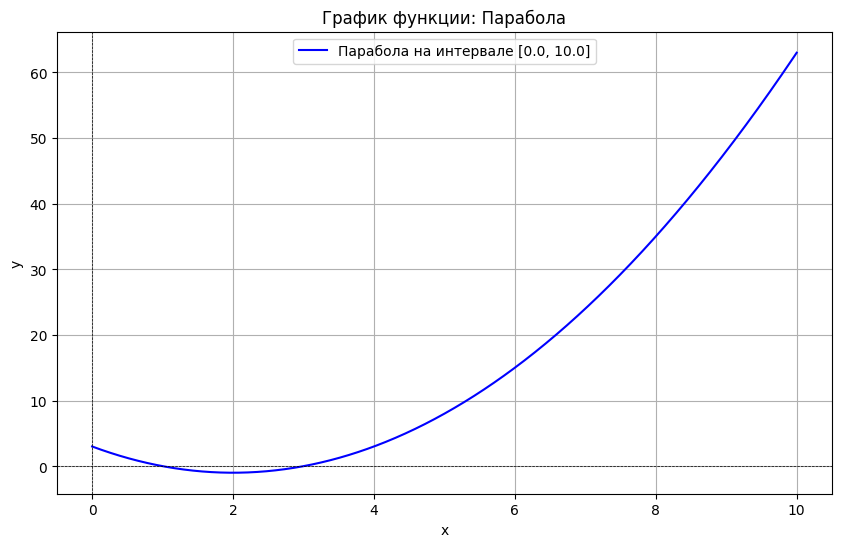

Точка минимума функции на интервале [0.0, 10.0]: x = 2.0020, y = -1.0000
Значение интеграла функции Парабола на интервале [0.0, 10.0]: 163.3333


In [4]:
choice = int(input("Введите номер функции (1, 2 или 3): "))
if choice not in functions:
    print("Неверный выбор функции!")
    exit()

# Ввод интервала
a = float(input("Введите начало интервала: "))
b = float(input("Введите конец интервала: "))

if a > b:
    print("Начало интервала не может быть больше конца!")
    exit()

# Выбранная функция
selected_function = functions[choice]["func"]
selected_name = functions[choice]["name"]

# Построение графика выбранной функции на заданном интервале
x_interval = np.linspace(a, b, 1000)
y_interval = selected_function(x_interval)

plt.figure(figsize=(10, 6))
plt.plot(x_interval, y_interval, label=f"{selected_name} на интервале [{a}, {b}]", color=functions[choice]["color"])
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Ось X
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Ось Y
plt.title(f"График функции: {selected_name}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Нахождение точки минимума на интервале
min_x = x_interval[np.argmin(y_interval)]
min_y = selected_function(min_x)
print(f"Точка минимума функции на интервале [{a}, {b}]: x = {min_x:.4f}, y = {min_y:.4f}")

# Вычисление интеграла на интервале
integral, _ = quad(selected_function, a, b)
print(f"Значение интеграла функции {selected_name} на интервале [{a}, {b}]: {integral:.4f}")

**2.** Написать программу, которая вычисляет факториал числа 100 000 и показывает, сколько времени ушло на решение этой задачи. Сначала требуется решить задачу с использованием одного потока, затем с двумя, четырьмя, восьмью. При использовании двух потоков один поток перемножает числа от 1 до 50 000, а второй – от 50 001 до 100 000, а затем результаты перемножаются (можно поэкспериментировать с разделением работы на две части, не обязательно делить интервал пополам, деление осуществлять автоматически). Сравните результаты вычисления факториала (нужно, чтобы результаты совпадали) и время вычисления при каждом способе.

In [6]:
import math
import time
from multiprocessing import Pool

# Функция для вычисления факториала на заданном интервале
def factorial_partial(start, end):
    result = 1
    for i in range(start, end + 1):
        result *= i
    return result

# Функция для вычисления факториала с использованием нескольких потоков
def factorial_multithreaded(n, num_threads):
    # Определяем разделение интервала
    step = n // num_threads
    intervals = [(i * step + 1, (i + 1) * step) for i in range(num_threads)]
    intervals[-1] = (intervals[-1][0], n)  # Убедимся, что последний интервал доходит до n

    # Запускаем вычисления в нескольких потоках
    with Pool(num_threads) as pool:
        partial_results = pool.starmap(factorial_partial, intervals)

    # Перемножаем результаты из всех потоков
    result = 1
    for partial in partial_results:
        result *= partial
    return result

# Основная функция для сравнения времени выполнения
def main():
    n = 100_000  # Факториал числа 100,000

    # Однопоточное вычисление
    start_time = time.time()
    factorial_single = factorial_partial(1, n)
    single_thread_time = time.time() - start_time
    print(f"Однопоточное вычисление: {single_thread_time:.2f} секунд")

    # Двухпоточное вычисление
    start_time = time.time()
    factorial_two_threads = factorial_multithreaded(n, 2)
    two_thread_time = time.time() - start_time
    print(f"Двухпоточное вычисление: {two_thread_time:.2f} секунд")

    # Четырёхпоточное вычисление
    start_time = time.time()
    factorial_four_threads = factorial_multithreaded(n, 4)
    four_thread_time = time.time() - start_time
    print(f"Четырёхпоточное вычисление: {four_thread_time:.2f} секунд")

    # Восьмипоточное вычисление
    start_time = time.time()
    factorial_eight_threads = factorial_multithreaded(n, 8)
    eight_thread_time = time.time() - start_time
    print(f"Восьмипоточное вычисление: {eight_thread_time:.2f} секунд")

    # Проверка совпадения результатов
    assert factorial_single == factorial_two_threads, "Результаты для двух потоков не совпадают!"
    assert factorial_single == factorial_four_threads, "Результаты для четырёх потоков не совпадают!"
    assert factorial_single == factorial_eight_threads, "Результаты для восьми потоков не совпадают!"
    print("Результаты совпадают для всех потоков!")

if __name__ == "__main__":
    main()

Однопоточное вычисление: 2.56 секунд


ValueError: Exceeds the limit (4300 digits) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit

**3.** Написать многопоточную программу, в которой каждый из двух потоков записывает в файл свой номер (1 или 2) 100 000 раз. Файл для обоих потоков один и тот же. Не допускается, чтобы сначала запись выполнял один поток полностью, а потом второй. Автоматически проверить, реально ли в результате в файле записано 100 000 единиц и 100 000 двоек.

In [7]:
import threading

# Количество записей от каждого потока
NUM_WRITES = 100_000
OUTPUT_FILE = "output.txt"

# Счетчики для проверки
ones_count = 0
twos_count = 0

# Блокировка для синхронизации потоков
lock = threading.Lock()

# Функция записи в файл
def write_to_file(thread_id):
    global ones_count, twos_count

    with open(OUTPUT_FILE, "a") as f:
        for _ in range(NUM_WRITES):
            with lock:  # Синхронизируем доступ к файлу
                f.write(str(thread_id) + "\n")

# Основная функция
def main():
    global ones_count, twos_count

    # Очищаем файл перед началом работы
    with open(OUTPUT_FILE, "w") as f:
        pass

    # Создаем два потока
    thread1 = threading.Thread(target=write_to_file, args=(1,))
    thread2 = threading.Thread(target=write_to_file, args=(2,))

    # Запускаем потоки
    thread1.start()
    thread2.start()

    # Дожидаемся завершения потоков
    thread1.join()
    thread2.join()

    # Проверяем содержимое файла
    with open(OUTPUT_FILE, "r") as f:
        contents = f.readlines()

    # Подсчитываем количество единиц и двоек
    ones_count = contents.count("1\n")
    twos_count = contents.count("2\n")

    print(f"Количество единиц (1): {ones_count}")
    print(f"Количество двоек (2): {twos_count}")

    # Проверяем корректность результата
    if ones_count == NUM_WRITES and twos_count == NUM_WRITES:
        print("Результат корректен: 100,000 единиц и 100,000 двоек.")
    else:
        print("Ошибка: Результат некорректен!")

if __name__ == "__main__":
    main()

Количество единиц (1): 100000
Количество двоек (2): 100000
Результат корректен: 100,000 единиц и 100,000 двоек.
